In [1]:
#import libraries
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from keras.utils import np_utils
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k

In [2]:
#load data
from google.colab import files
file= files.upload()
df= pd.read_csv("disease_combined.csv")
df.head()

Saving disease_combined.csv to disease_combined.csv


,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,patientID
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy,2
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD,3
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis,4
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction,5


In [3]:
#shape data
df.shape



(4962, 134)

In [4]:
df= df.dropna(axis=0)
df.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,vomiting,burning_micturition,spotting_ urination,fatigue,weight_gain,anxiety,cold_hands_and_feets,mood_swings,weight_loss,restlessness,lethargy,patches_in_throat,irregular_sugar_level,cough,high_fever,sunken_eyes,breathlessness,sweating,dehydration,indigestion,headache,yellowish_skin,dark_urine,nausea,loss_of_appetite,pain_behind_the_eyes,back_pain,constipation,abdominal_pain,...,toxic_look_(typhos),depression,irritability,muscle_pain,altered_sensorium,red_spots_over_body,belly_pain,abnormal_menstruation,dischromic _patches,watering_from_eyes,increased_appetite,polyuria,family_history,mucoid_sputum,rusty_sputum,lack_of_concentration,visual_disturbances,receiving_blood_transfusion,receiving_unsterile_injections,coma,stomach_bleeding,distention_of_abdomen,history_of_alcohol_consumption,fluid_overload.1,blood_in_sputum,prominent_veins_on_calf,palpitations,painful_walking,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,patientID
0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Fungal infection,1
1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Allergy,2
2,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,GERD,3
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Chronic cholestasis,4
4,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Drug Reaction,5


In [5]:
#class_names = ["Fungal infection","Allergy","GERD","Chronic cholestasis","Drug Reaction","Peptic ulcer diseae","AIDS","Diabetes","Gastroenteritis","Bronchial Asthma","Hypertension","Migraine","Cervical spondylosis","Paralysis (brain hemorrhage)","Jaundice","Malaria","Chicken pox","Dengue","Typhoid","hepatitis A","Hepatitis B","Hepatitis C","Hepatitis D","Hepatitis E","Alcoholic hepatitis","Tuberculosis","Common Cold","Pneumonia","Dimorphic hemmorhoids(piles)","Heart attack","Varicose veins","Hypothyroidism","Hyperthyroidism","Hypoglycemia","Osteoarthristis","Arthritis","(vertigo) Paroymsal  Positional Vertigo","Acne","Urinary tract infection","Psoriasis","Impetigo"]
#dict(zip(class_names, range(len(class_names))))

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4962 entries, 0 to 4961
Columns: 134 entries, itching to patientID
dtypes: int64(133), object(1)
memory usage: 5.1+ MB


In [7]:
#transform
#for column in df.columns:
  #if df[column].dtype== np.number:
    #continue
  #else:
    #df[column]= LabelEncoder().fit_transform(df[column])

#df.head()

In [8]:
#splitting the features from the target
X =df.drop(['prognosis'], axis=1)
y=df['prognosis']


In [9]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
y= k.utils.to_categorical(encoded_Y)
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
#Feature scaling to measure 
x_scaler= MinMaxScaler()
x_scaler.fit(X)
col_names=X.columns
X[col_names]= x_scaler.transform(X)

In [11]:
#Split 80% training, 20% testing
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, shuffle=True)

In [12]:
num_hidden=4962/(6*(133+41))
num_hidden

4.752873563218391

In [13]:
#build model using an initalizer to set random weights 
model= Sequential()
model.add(Dense(200, input_dim=len(X.columns), kernel_initializer= k.initializers.random_normal(seed=1),activation='relu'))

In [14]:
number_classes = 41
model.add(Dense(units=number_classes, activation='softmax'))

In [15]:
#Compile model
#use adam optamizer for deep neural network
opt = SGD(lr=0.01, momentum=0.9)
model.compile(loss='categorical_crossentropy', optimizer= opt, metrics=['accuracy'])

In [16]:
#train model 
train= model.fit(X_train, y_train, epochs= 1000, batch_size= X_train.shape[0])

Epoch 1/1000
1/1 [==============================] - 1s 592ms/step - loss: 3.7311 - accuracy: 0.0257
Epoch 2/1000
1/1 [==============================] - 0s 29ms/step - loss: 3.7296 - accuracy: 0.0257
Epoch 3/1000
1/1 [==============================] - 0s 28ms/step - loss: 3.7266 - accuracy: 0.0265
Epoch 4/1000
1/1 [==============================] - 0s 27ms/step - loss: 3.7224 - accuracy: 0.0285
Epoch 5/1000
1/1 [==============================] - 0s 36ms/step - loss: 3.7171 - accuracy: 0.0325
Epoch 6/1000
1/1 [==============================] - 0s 26ms/step - loss: 3.7108 - accuracy: 0.0365
Epoch 7/1000
1/1 [==============================] - 0s 30ms/step - loss: 3.7036 - accuracy: 0.0388
Epoch 8/1000
1/1 [==============================] - 0s 41ms/step - loss: 3.6956 - accuracy: 0.0431
Epoch 9/1000
1/1 [==============================] - 0s 25ms/step - loss: 3.6869 - accuracy: 0.0496
Epoch 10/1000
1/1 [==============================] - 0s 32ms/step - loss: 3.6776 - accuracy: 0.0650
Epoch 11

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               26800     
_________________________________________________________________
dense_1 (Dense)              (None, 41)                8241      
Total params: 35,041
Trainable params: 35,041
Non-trainable params: 0
_________________________________________________________________


In [18]:
train_acc = model.evaluate(X_train, y_train, verbose=0)
train_acc

[0.02867775782942772, 1.0]

In [19]:
#save model
model.save('train.model')

INFO:tensorflow:Assets written to: train.model/assets


Text(0.5, 0, 'epoch')

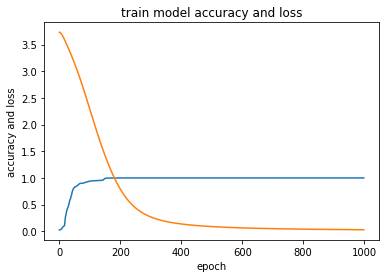

In [20]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['loss'])
plt.title('train model accuracy and loss')
plt.ylabel('accuracy and loss')
plt.xlabel('epoch')